In [5]:
import pandas as pd
import os
import shutil 
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from openpyxl import load_workbook
#import statistics as stats
#from scipy.stats import mode
os.chdir(r"C:\Users\DioandNono\Documents\GitHub\PHD\Ideas\DataCyprus")
os.getcwd()
os.listdir('.')

['.ipynb_checkpoints',
 'GDP.ipynb',
 'GDPperCapita_Compact.xlsx',
 'Microdata',
 'mpd2020.xlsx',
 'patentdata.xlsx',
 'patenttest.xlsx',
 'Programming',
 'Programming.rar',
 'test.xlsx',
 'test2.xlsx',
 '~$GDPperCapita_Compact.xlsx',
 '~$patentdata.xlsx']

In [2]:
# excel_file = 'GDPperCapita_Compact.xlsx'
#not sure what to do

shutil.copy("GDPperCapita_Compact.xlsx", "test.xlsx")
shutil.copy("patentdata.xlsx", "patenttest.xlsx")


gdpfile ='test.xlsx'
patentfile = 'patenttest.xlsx'

workbook = load_workbook(filename="test.xlsx")
activeworkbook = workbook.active

sheet0 = pd.read_excel(gdpfile, sheet_name=0)
sheet1 = pd.read_excel(gdpfile, sheet_name=1)
sheet2 = pd.read_excel(gdpfile, sheet_name=2)

patentsheet = pd.read_excel(patentfile, sheet_name=0)

#sheet1.head()
#get first 5 entries
#sheet1.shape
#Get dimensions of matrix

shape=sheet1.shape
totalrows = shape[0]
sheet0rows= sheet0.shape[0]

C:\Users\DioandNono\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [12]:
def clio_time_series(Country):
    time_series= []
    for t in range(totalrows):
        if sheet1['country.name'][t] == Country:
            time_series.append(sheet1['value'][t])
    return time_series
def return_value(data,row,column):
    return data.loc[row,column]
def fetchpatentrow(data, year):    
    return data.loc[data['Year of Application or Grant'] == year].index[0]
def patentandgdpfetch(date):
    p = []
    p.append(date) #Add Date
    p.append(sheet0[str(date)][144]) #GDPPC
    p.append(gdpgrowth(date,date+1)) #GDP growth
    p.append(return_value(patentsheet ,fetchpatentrow(patentsheet, date), 'Total Patent Grants'))  #Patents
    return p
def make_dataframe(start,end):
    vector = []
    for x in range(end-start+1):
        vector.append(patentandgdpfetch(start + x))
    return vector
def gdpgrowth(start,end):
    higher =  sheet0[str(end)][144]
    lower = sheet0[str(start)][144]
    growth = (higher-lower)/lower
    return growth
def plot():
    # Define plot space
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    ax1.set_xlabel('Date')    
    
    
    color = 'tab:red'
    ax1.set_ylabel('GDPGrowth', color=color)
    ax1.plot(df['year'], 
            df['GDPGrowth'], label = 'GDPGrowth', color =color)
    ax1.tick_params(axis='y', labelcolor=color)


    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.set_ylabel('Patemts', color=color)  # we already handled the x-label with ax1
    ax2.plot(df['year'], df['Patents'], label = 'Patents', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.show()

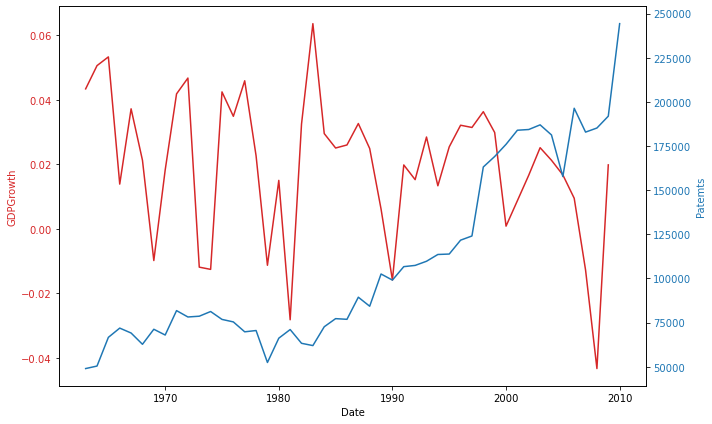

In [17]:
matrix = make_dataframe(1963,2010)
df = pd.DataFrame(matrix, columns = ['year', 'GDPPerCapita','GDPGrowth','Patents'])
plot()

In [20]:
column_1 = df["GDPGrowth"]
column_2 = df["Patents"]
correlation = column_1.corr(column_2)
correlation

-0.28621546558785316

In [174]:
gdpgrowth(1964,1965)

0.050575432553041574

In [170]:
sheet0[str(1964)][144]


12773.0

In [169]:
sheet0[str(1965)][144]

13419.0

'Maddison Data' 

In [12]:
#not sure what to do

shutil.copy("mpd2020.xlsx", "test2.xlsx")

gdpfile2 ='test2.xlsx'

workbook = load_workbook(filename="test2.xlsx")
activeworkbook = workbook.active

sheet0 = pd.read_excel(gdpfile2, sheet_name=0)
sheet1 = pd.read_excel(gdpfile2, sheet_name=1)
sheet2 = pd.read_excel(gdpfile2, sheet_name=2)
sheet3 = pd.read_excel(gdpfile2, sheet_name=3)
sheet4 = pd.read_excel(gdpfile2, sheet_name=4)
sheet5 = pd.read_excel(gdpfile2, sheet_name=5)

#sheet1.head()
#get first 5 entries
#sheet1.shape
#Get dimensions of matrix

shape=sheet2.shape
totalrows = shape[0]

df = pd.DataFrame(data=sheet2)

In [13]:
def mad_time_series(Country):
    cdf = df.loc[df['country'] == Country]
    return cdf
Cyprus = mad_time_series('Cyprus')
def plot_country(Country):
    # Define plot space
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.set_xlabel('Date [s]')
    ax.set_ylabel('GDP per capita')
    
    ax.plot(Country['year'], 
            Country['gdppc'])
    ax.axvspan(1960, 1964, 
           label="Independence period",color="green", alpha=0.3)
    ax.axvspan(1967, 1974, 
           label="Greek Junta and Turkish Invasion",color="Orange", alpha=0.3)
    ax.axvspan(2004, 2008, 
           label="EU accession and adoption of Euro",color="Blue", alpha=0.3)
    ax.axvspan(2012, 2013, 
           label="Crisis and Bank deposit seizure",color="Red", alpha=0.3)
    ax.legend()
    plt.show()


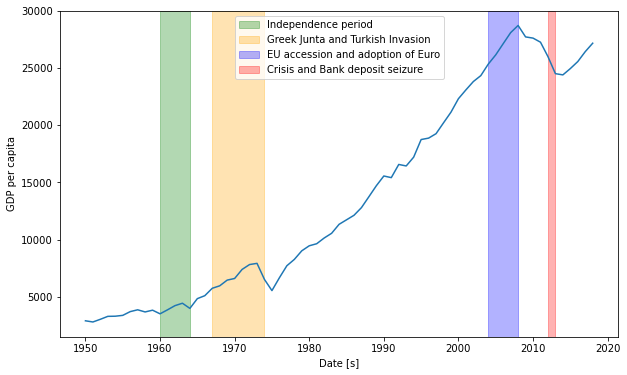

In [45]:
plot_country(Cyprus)

In [15]:
Cyprus = mad_time_series('Cyprus')

In [16]:
Cyprus


,countrycode,country,year,gdppc,pop
4086,CYP,Cyprus,1950,2885.0000,494.000000
4087,CYP,Cyprus,1951,2782.0000,502.000000
4088,CYP,Cyprus,1952,3017.0000,508.000000
4089,CYP,Cyprus,1953,3274.0000,515.000000
4090,CYP,Cyprus,1954,3287.0000,523.000000
...,...,...,...,...,...
4150,CYP,Cyprus,2014,24411.0000,1001.646407
4151,CYP,Cyprus,2015,24963.0000,995.959079
4152,CYP,Cyprus,2016,25577.0000,1000.537845
4153,CYP,Cyprus,2017,26445.2868,1009.888655


In [32]:
Cyprus

,countrycode,country,year,gdppc,pop
4086,CYP,Cyprus,1950,2885.0000,494.000000
4087,CYP,Cyprus,1951,2782.0000,502.000000
4088,CYP,Cyprus,1952,3017.0000,508.000000
4089,CYP,Cyprus,1953,3274.0000,515.000000
4090,CYP,Cyprus,1954,3287.0000,523.000000
...,...,...,...,...,...
4150,CYP,Cyprus,2014,24411.0000,1001.646407
4151,CYP,Cyprus,2015,24963.0000,995.959079
4152,CYP,Cyprus,2016,25577.0000,1000.537845
4153,CYP,Cyprus,2017,26445.2868,1009.888655
